# Run the whole deltas algorithm

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
import deltas

## Get data and classifier

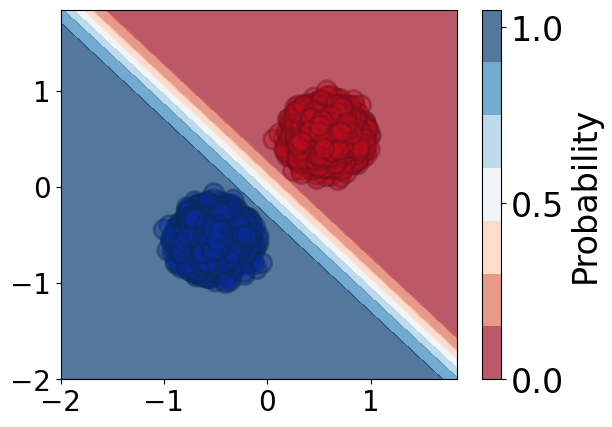

In [2]:
N1 = 10000
N2 = 10000
data_clf = pipeline.get_data_and_classifier(N1=N1, N2=N2)

data = data_clf['data']
clf = data_clf['clf']
m1 = data_clf['mean1']
m2 = data_clf['mean2']

## Get projection and data we need (R, D, M etc.)

R1 empirical: 0.43264499442273346
R2 empirical: 0.4852701057284281


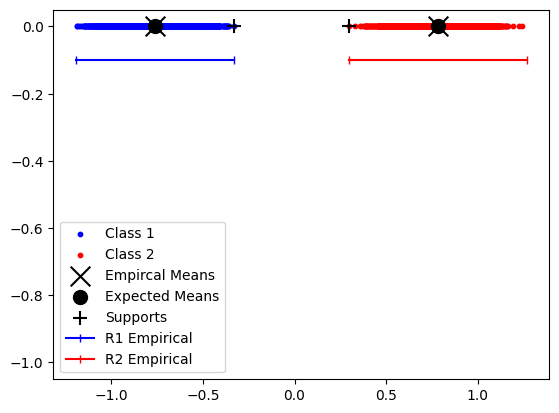

In [3]:
data_info = pipeline.data_project_and_info(
    data=data_clf['data'], m1=data_clf['mean1'], m2=data_clf['mean2'], clf=data_clf['clf'])

## set up extra parameters

In [4]:
# Costs
data_info['c1'] = 1
data_info['c2'] = 1
data_info['N1'] = N1
data_info['N2'] = N2
pipeline.print_params(data_info)

Parameters
        R:  1.2389806786341977
        N1: 10000
        N2: 10000
        R1: 0.43264499442273346
        R2: 0.4852701057284281
        M:  0.6252377132071252
        D:  1.5431528133582866
        C1: 1
        C2: 1


## Optimiser

0.05338600505869865
0.2614857254038672
-0.5253914858682336
delta1 : 0.5347543185066584 
delta2: 0.05338600505869865
constraint: -0.5318221568224564 should equal 0
R1_est : 0.4712873330411502 
R2_est: 0.5239124443468449


/home/matt/projects/linear_confidence/radius.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  error = (R_sup/np.sqrt(N)) * (2 + (np.sqrt( 2*np.log(1/delta) )))
/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


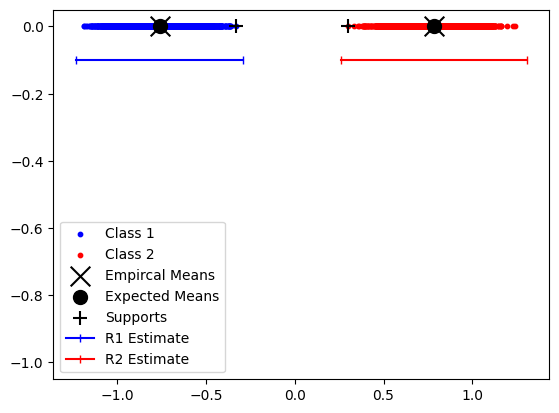

In [5]:

loss_func = deltas.scipy_optim_func   # returns tuple for (loss_func, gradient)
loss_func = deltas.loss_one_delta   # loss_func only - won't use gradient during optimisation
loss_func = lambda delta, data_info: deltas.loss(delta[0], delta[1], data_info)

contraint_func = deltas.contraint_eq7
# contraint_func = deltas.contraint_eq8

delta1_from_delta2_func = deltas.delta2_given_delta1
 
delta1, delta2 = pipeline.optimise(
    data_info, loss_func, contraint_func, num_deltas=2)